In [2]:
import numpy as np
import struct

## Visualization

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt  
from matplotlib import colors, patches
from matplotlib.ticker import PercentFormatter

In [4]:
def abline(slope, intercept, color, label):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=color, label = label)
    plt.legend()
    plt.xlabel('Keys')
    plt.ylabel('Rank')

In [5]:
def calculate_mean_squared_error(x, y):
    regressor = LinearRegression()
    regressor.fit(x, y) 
    y_pred = regressor.predict(x)
    print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
    # Plot outputs
    plt.scatter(x, y,  color='black')
    abline(regressor.coef_, regressor.intercept_, color="blue", label="Regression line")
    plt.show()

In [6]:
def plot_distribution_of_keys(X):
    # we observe that poisoning keys are densly populated together
    # get range for x-axis by looking at first and last element
    plt.hist(X, bins = 100)
    plt.show()

### Option 1: Plot CDF directly via Matplotlib

In [7]:
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

In [8]:
def plot_cdf(X):
    fig, ax = plt.subplots()
    plt.hist(X, bins = 1000, density = True, cumulative=True, label='CDF', histtype='step', alpha=0.55, color='purple')
    fix_hist_step_vertical_line_at_end(ax)
    #plt.show()

### Option 2: Calculate CDF in numpy and plotm via Matplotlib

In [18]:
# Source: https://stackoverflow.com/questions/46040683/matplotlib-cdf-goes-back-to-zero
def plot_cdf_with_numpy(X):
    h, edges = np.histogram(X, density=True, bins=100, )
    h = np.cumsum(h)/np.cumsum(h).max()

    X = edges.repeat(2)[:-1]
    y = np.zeros_like(X)
    y[1:] = h.repeat(2)

    plt.plot(X,y)
    plt.xlabel("Key", fontsize=14)
    plt.ylabel("Position", fontsize=14)
    plt.show()

In [10]:
"""
Source: Scipy - https://github.com/scipy/scipy/blob/v1.7.0/scipy/stats/stats.py#L8631-L8737
"""
def rankdata(array):
    #arr = np.ravel(np.asarray(array))
    algo = 'mergesort'
    sorter = np.argsort(array, kind=algo)

    inv = np.empty(sorter.size, dtype=np.intp)
    inv[sorter] = np.arange(sorter.size, dtype=np.intp)
    return inv + 1

In [11]:
def read_dataset(dataset_filename : str):
    keyset = np.fromfile("../data/" + dataset_filename, dtype=np.uint64)[1:]
    print("Length of keyset: ", len(keyset))
    rankset = rankdata(keyset)
    keyset = keyset.reshape(-1, 1)
    return (keyset, rankset)

Length of keyset:  200000000


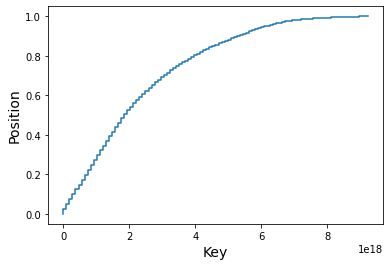

In [22]:
X, y = read_dataset("books_200M_uint64")
plot_cdf_with_numpy(X)

In [20]:
X, y = read_dataset("fb_200M_uint64")

Length of keyset:  200000000


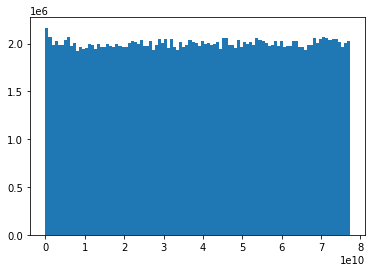

In [56]:
plot_distribution_of_keys(X[0:200000000-21])

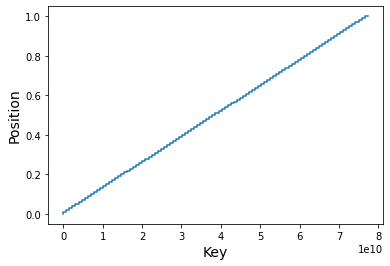

In [21]:
plot_cdf_with_numpy(X[0:200000000-21])

In [12]:
#calculate_mean_squared_error(X, y)

Length of keyset:  200000000


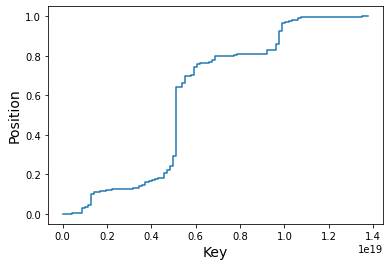

In [23]:
X, y = read_dataset("osm_cellids_200M_uint64")
plot_cdf_with_numpy(X)

Length of keyset:  200000000


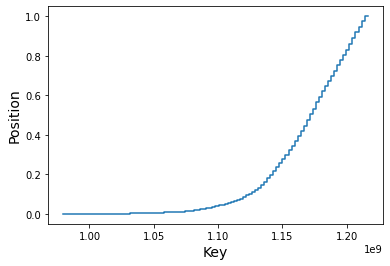

In [24]:
X, y = read_dataset("wiki_ts_200M_uint64")
plot_cdf_with_numpy(X)

In [14]:
X_poisoned, y_poisoned = read_dataset("random_5000.csv")

Length of keyset:  6667


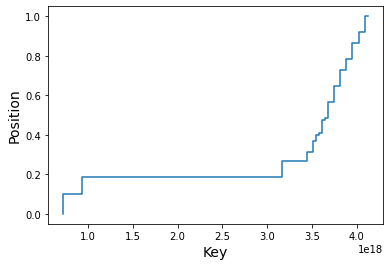

In [19]:
plot_cdf_with_numpy(X_poisoned)

## Experiments

In [27]:
X

array([[   33246697004540789],
       [   33803812205905263],
       [   35354035426312061],
       ...,
       [13748546747251582973],
       [13748549577969753901],
       [13748550930623082253]], dtype=uint64)

In [28]:
X_poisoned

array([[   33246697004540788],
       [   33246697004540789],
       [   33246697004540790],
       ...,
       [13748546747251582973],
       [13748549577969753901],
       [13748550930623082253]], dtype=uint64)

In [29]:
len(X[np.in1d(X, X_poisoned)])

200000000

In [31]:
temp = np.setdiff1d(X_poisoned, X)

In [36]:
temp[1000:2000]

array([1192263903657061320, 1192263903657061321, 1192263903657061322,
       1192263903657061323, 1192263903657061324, 1192263903657061325,
       1192263903657061326, 1192263903657061327, 1192263903657061328,
       1192263903657061329, 1192263903657061330, 1192263903657061331,
       1192263903657061332, 1192263903657061333, 1192263903657061334,
       1192263903657061335, 1192263903657061336, 1192263903657061337,
       1192263903657061338, 1192263903657061339, 1192263903657061340,
       1192263903657061341, 1192263903657061342, 1192263903657061343,
       1192263903657061344, 1192263903657061345, 1192263903657061346,
       1192263903657061347, 1192263903657061348, 1192263903657061349,
       1192263903657061350, 1192263903657061351, 1192263903657061352,
       1192263903657061353, 1192263903657061354, 1192263903657061355,
       1192263903657061356, 1192263903657061357, 1192263903657061358,
       1192263903657061359, 1192263903657061360, 1192263903657061361,
       1192263903657